In [63]:
# 📚 Basic Libraries
import numpy as np
import pandas as pd
import warnings

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.preprocessing import StandardScaler

# 01 | Data Extraction

In [65]:
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [67]:
df = pd.read_csv('mental_health_dataset.csv')
df

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,Non-binary,Other,Germany,No,NaN,Yes,Low,9.3,50,0
996,997,31,Male,Sales,Canada,No,NaN,No,High,4.5,37,6
997,998,33,Female,IT,Germany,No,High,Yes,Medium,9.7,73,10
998,999,42,Female,Finance,Australia,Yes,NaN,No,Medium,6.5,79,8


# 02 | Data Cleaning & Exploration

In [69]:
df1 = df[df['Mental_Health_Condition'] == 'Yes']

In [75]:
df1

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5
5,6,64,Non-binary,IT,UK,Yes,High,No,High,6.3,34,0
7,8,57,Male,IT,UK,Yes,Medium,Yes,High,4.2,57,9
19,20,42,Non-binary,Education,Canada,Yes,High,No,Low,8.5,36,2
...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,62,Non-binary,Engineering,USA,Yes,High,Yes,Low,7.0,44,5
974,975,52,Prefer not to say,Finance,USA,Yes,High,Yes,Medium,8.9,56,0
976,977,18,Female,Education,Australia,Yes,Medium,No,Low,9.3,77,1
986,987,26,Prefer not to say,Other,UK,Yes,Medium,No,Low,5.3,73,9


In [ ]:
515-267

In [73]:
df1.dropna(subset='Severity', inplace=True)

In [77]:
df1.to_csv('Mental_severity.csv', index=False)

In [11]:
df1.drop(columns=['User_ID', 'Mental_Health_Condition'], inplace=True)

In [13]:
df1.Severity.value_counts()

Severity
Low       87
Medium    85
High      76
Name: count, dtype: int64

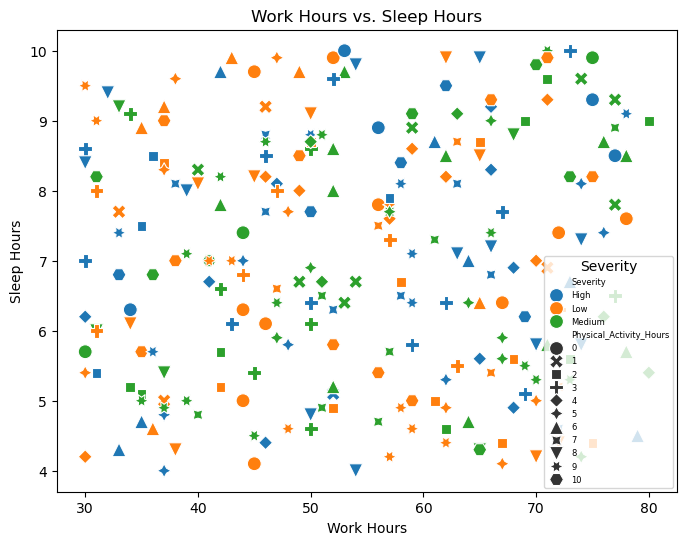

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='Work_Hours', y='Sleep_Hours', hue='Severity', style='Physical_Activity_Hours', s=100)
plt.title('Work Hours vs. Sleep Hours')
plt.xlabel('Work Hours')
plt.ylabel('Sleep Hours')
plt.legend(title='Severity', fontsize=6)
plt.show()

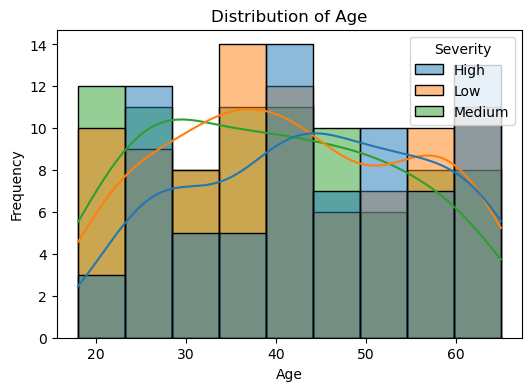

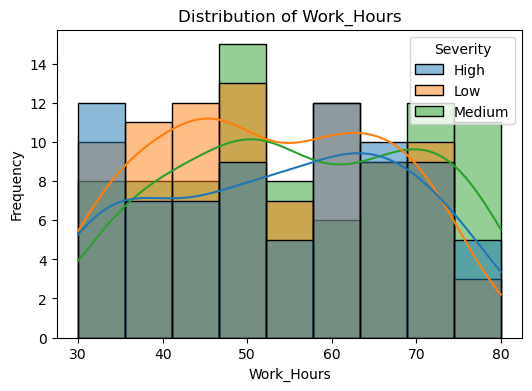

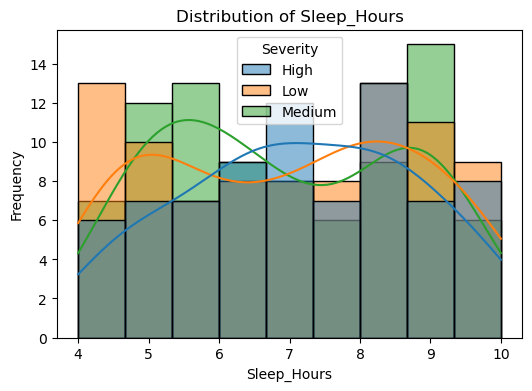

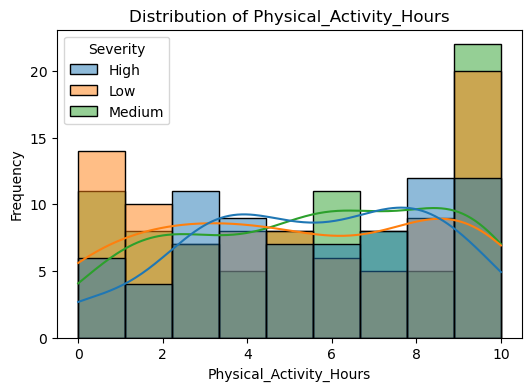

In [79]:
variables = ['Age', 'Work_Hours', 'Sleep_Hours', 'Physical_Activity_Hours']

for var in variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df1, x=var, kde=True, hue='Severity', color='blue')  # Histograma con línea de densidad
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [19]:
mapeo = {'Yes':1,
         'No':0
        }

In [21]:
mapeo1 = {'Low':0,
          'Medium':1,
          'High':2
         }

In [23]:
df1['Consultation_History'] = df1['Consultation_History'].map(mapeo)

In [25]:
df1['Stress_Level'] = df1['Stress_Level'].map(mapeo1)

In [27]:
target = df1.pop("Severity")
df1['Severity'] = target

In [ ]:
df2.isna().sum()

In [31]:
categorical_columns = ['Gender', 'Occupation', 'Country']

In [33]:
df2 = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)

# 03 | Data Preprocessing

In [35]:
y = df2['Severity']
X = df2.drop(columns='Severity')

In [37]:
from sklearn.decomposition import PCA

# 04 | Standardization

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.72809655, -0.98399897, -1.29555316, ..., -0.35675303,
        -0.42538498,  2.21466971],
       [-1.46629097, -0.98399897, -0.04536957, ..., -0.35675303,
        -0.42538498, -0.4515346 ],
       [ 1.65380847, -0.98399897,  1.20481402, ..., -0.35675303,
         2.35081173, -0.4515346 ],
       ...,
       [-1.7634433 , -0.98399897, -1.29555316, ..., -0.35675303,
        -0.42538498, -0.4515346 ],
       [-1.16913865, -0.98399897, -1.29555316, ..., -0.35675303,
         2.35081173, -0.4515346 ],
       [ 0.76235149, -0.98399897, -0.04536957, ..., -0.35675303,
        -0.42538498, -0.4515346 ]])

# 05 | Modeling & Reporting

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [49]:
y

2        High
4         Low
5        High
7      Medium
19       High
        ...  
971      High
974      High
976    Medium
986    Medium
992      High
Name: Severity, Length: 248, dtype: object

In [51]:
pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
pca_df['Severity'] = y.to_list()

In [53]:
len(pca_df)

248

In [55]:
pca_df.sample(10)

,PC1,PC2,Severity
124,0.525584,0.015177,High
64,0.685198,-1.292618,Low
222,0.803942,-0.635240,High
151,0.491454,-0.288916,High
61,-2.753018,2.060412,Low
42,2.493054,0.857422,High
3,-2.623808,1.525479,Medium
197,0.304833,-0.552627,Low
111,-0.513635,0.902482,High
158,1.171935,0.488892,Low


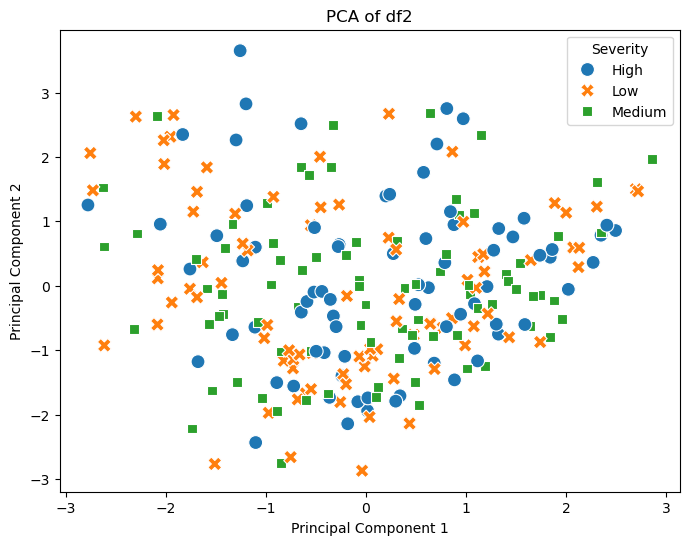

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Severity', style='Severity', s=100)
plt.title('PCA of df2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Severity')
plt.show()